1. 172.28.0.1
2. 66.249.94.186
3. 206.81.80.152
4. 152.195.92.129
5. 93.184.216.34
6. 93.184.216.34
7. 93.184.216.34
8. 93.184.216.34
9. 93.184.216.34
10. 93.184.216.34
11. 93.184.216.34
12. 93.184.216.34
13. 93.184.216.34
14. 93.184.216.34
15. 93.184.216.34
16. 93.184.216.34
17. 93.184.216.34
18. 93.184.216.34
19. 93.184.216.34
20. 93.184.216.34
21. 93.184.216.34
22. 93.184.216.34
23. 93.184.216.34
24. 93.184.216.34
25. 93.184.216.34
26. 93.184.216.34
27. 93.184.216.34
28. 93.184.216.34
29. 93.184.216.34
30. 93.184.216.34


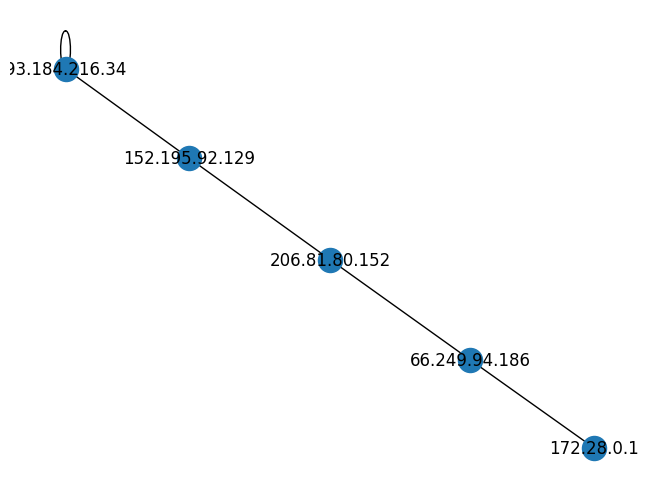

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from scapy.all import *

def traceroute(destination, max_hops):
    # Set the destination and maximum number of hops
    dport = 33434  # Destination port for traceroute
    ttl = 1

    # Create an empty graph
    G = nx.Graph()

    prev_ip = None

    while True:
        # ICMP echo request packet with the specified TTL
        packet = IP(dst=destination, ttl=ttl) / ICMP()

 
        reply = sr1(packet, verbose=False, timeout=1)

        if reply is None:
            # No response received
            print(f"{ttl}. *")
        elif reply.type == 3:
            # Destination reached
            print(f"{ttl}. {reply.src}")
            break
        else:
            # Intermediate hop reached
            print(f"{ttl}. {reply.src}")

            if prev_ip is not None:
                # Add an edge to the graph between the current and previous hop
                G.add_edge(prev_ip, reply.src)

            prev_ip = reply.src

        # Increment TTL 
        ttl += 1

        if ttl > max_hops:
            # Maximum number of hops reached
            break

    # network graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

# example
traceroute("www.example.com", 30)
